# Human Activity Recocnition using Accelerometer Data

Dataset: https://www.cis.fordham.edu/wisdm/dataset.php

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.18.0


### Load Dataset

In [7]:
file = open("/Users/ridvanyigit/Desktop/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt")
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number:', i)

Error at line number: 281873
Error at line number: 281874
Error at line number: 281875


In [9]:
#pd.read_csv("/Users/ridvanyigit/Desktop/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt")

In [12]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']

In [13]:
data = pd.DataFrame(data=processedList, columns=columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [14]:
data.shape

(343416, 6)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [16]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [ ]:
data['activity'].value_counts() #Highly inbalance data

activity
Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: count, dtype: int64

### Balance this data

In [19]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [22]:
activities = data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object', name='activity')

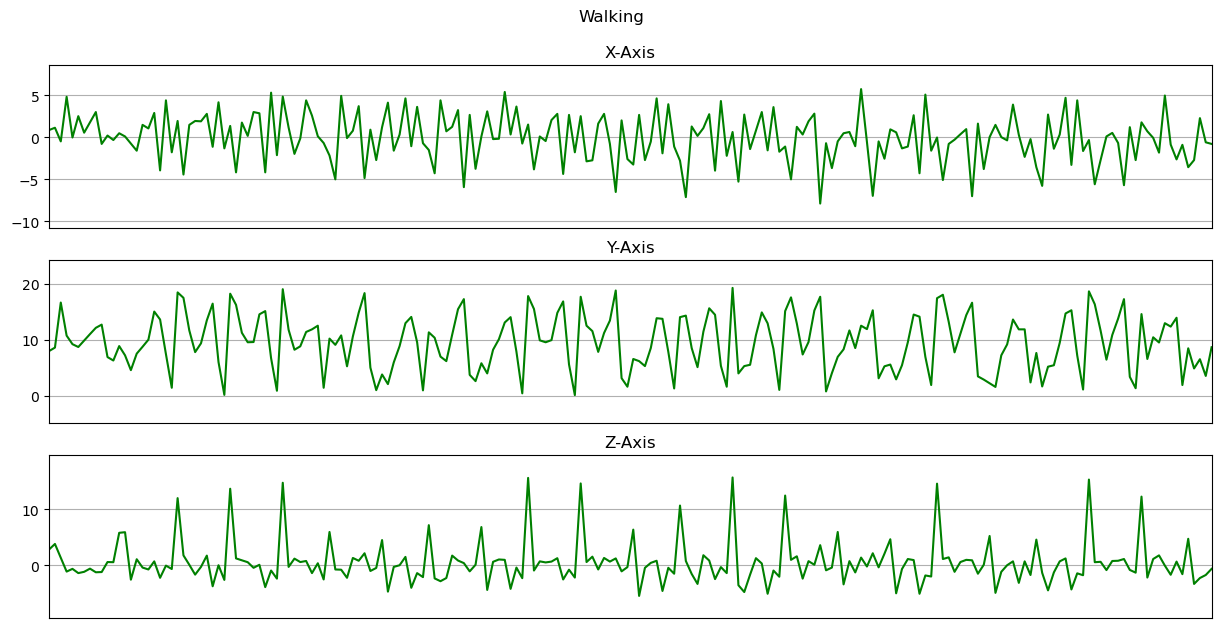

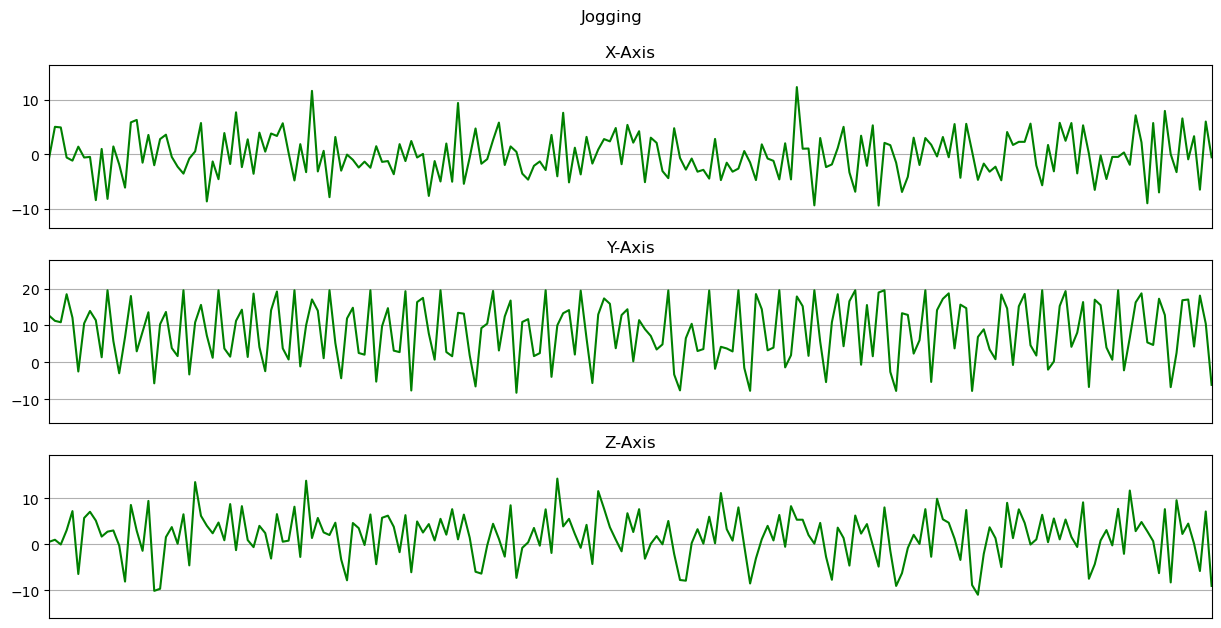

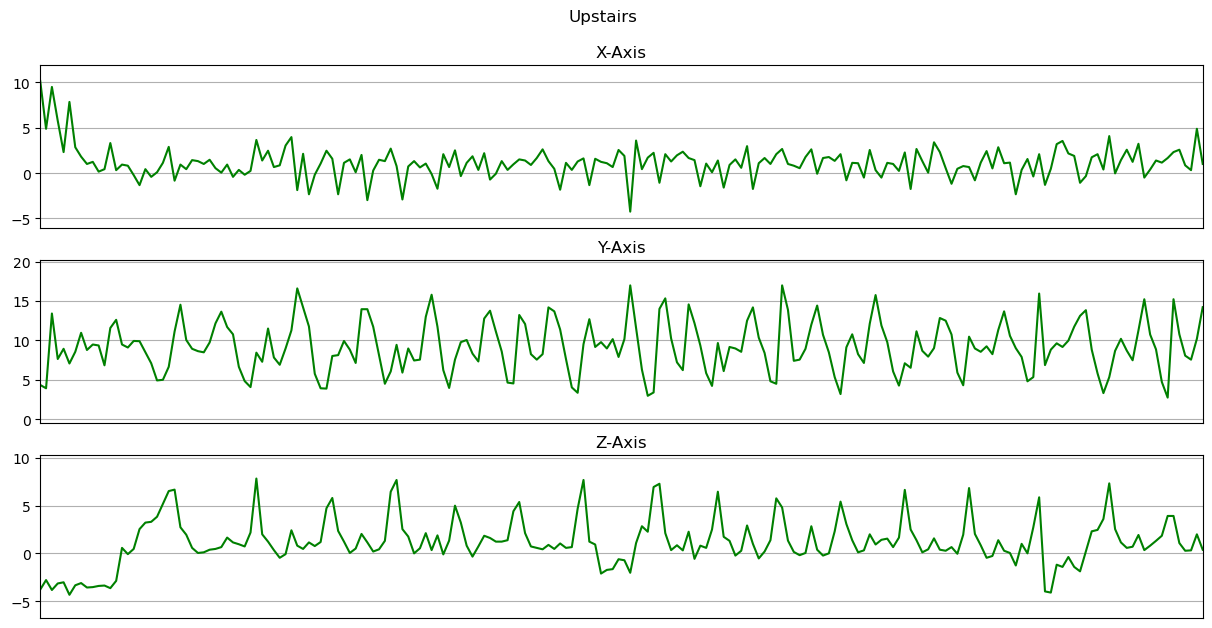

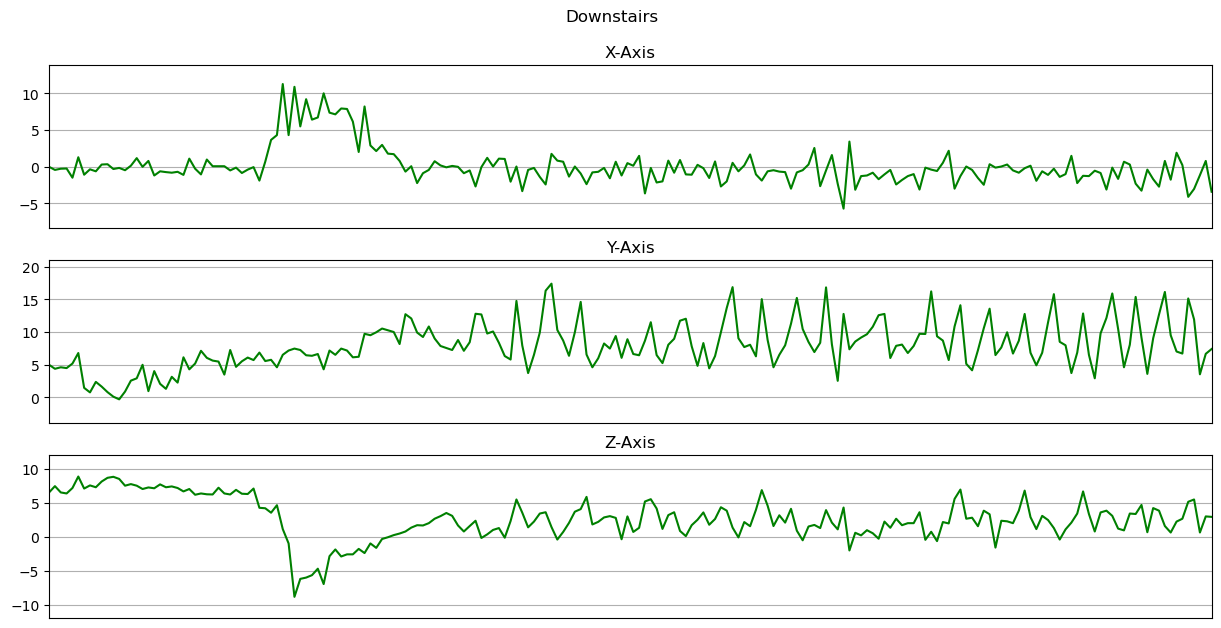

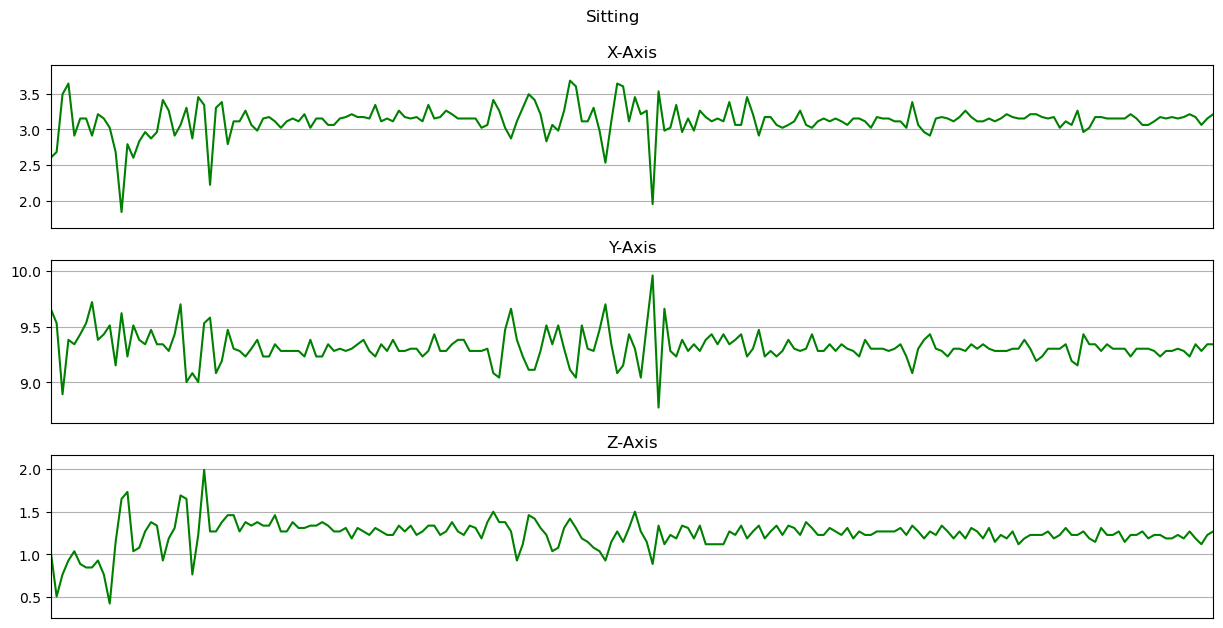

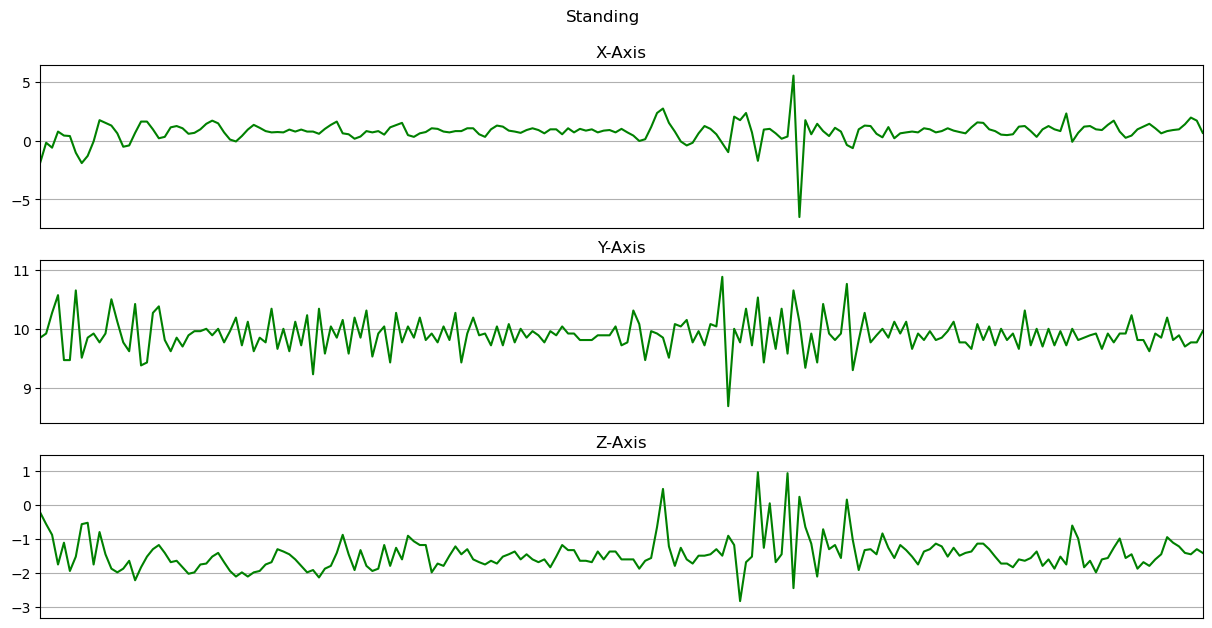

In [23]:
Fs = 20

def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15,7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity']==activity)][:Fs*10]
    plot_activity(activity, data_for_plot)


In [24]:
df = data.drop(['user', 'time'], axis=1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [25]:
df['activity'].value_counts()

activity
Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: count, dtype: int64

In [26]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].head(3555).copy()

In [28]:
data_list = [Walking, Jogging, Upstairs, Downstairs, Sitting, Standing]

balanced_data = pd.DataFrame()
balanced_data = pd.concat(data_list, ignore_index=True)
balanced_data.shape

(21330, 4)

In [29]:
balanced_data['activity'].value_counts()

activity
Walking       3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Name: count, dtype: int64

In [30]:
balanced_data.head()

,activity,x,y,z
0,Walking,0.844462,8.008764,2.792171
1,Walking,1.116869,8.621680,3.786457
2,Walking,-0.503953,16.657684,1.307553
3,Walking,4.794363,10.760075,-1.184970
4,Walking,-0.040861,9.234595,-0.694638


In [31]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
0,Walking,0.844462,8.008764,2.792171,5
1,Walking,1.116869,8.621680,3.786457,5
2,Walking,-0.503953,16.657684,1.307553,5
3,Walking,4.794363,10.760075,-1.184970,5
4,Walking,-0.040861,9.234595,-0.694638,5


In [32]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

### Standardized data

In [33]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data=X, columns=['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


### Frame Preparation

In [39]:
import scipy.stats as stats

In [40]:
Fs = 20
frame_size = Fs*4   # 80
hop_size = Fs*2

In [43]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []

    for i in range(0, len(df) - frame_size, hop_size):
        # Veri türlerini kontrol et ve gerekirse dönüştür
        x = pd.to_numeric(df['x'].values[i: i + frame_size], errors='coerce').astype(float)
        y = pd.to_numeric(df['y'].values[i: i + frame_size], errors='coerce').astype(float)
        z = pd.to_numeric(df['z'].values[i: i + frame_size], errors='coerce').astype(float)

        # Retrieve the most often used label in this segment

        # pandas.Series.mode kullan
        mode_result = df['label'][i: i + frame_size].mode()

        # Mod sayısını kontrol et
        if len(mode_result) > 0:
            label = mode_result[0]  # En sık tekrar eden ilk etiketi al
        else:
            # Eğer mod yoksa (örneğin, tüm etiketler farklıysa) bir varsayılan değer ata
            label = np.nan  # Veya başka bir uygun varsayılan değer


        frames.append([x,y,z])
        labels.append(label)

    #Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [44]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [45]:
X.shape, y.shape

((532, 80, 3), (532,))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [48]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [49]:
X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)

In [50]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

### 2D CNN Model

In [53]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation='relu', input_shape=X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 79, 2, 16)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 79, 2, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 78, 1, 32)      │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 78, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2496)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       159,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,358 (634.21 KB)

 Trainable params: 162,358 (634.21 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [55]:
history = model.fit(
    X_train,
    y_train,
    epochs= 10,
    validation_data= (X_test, y_test),
    verbose=1
)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1956 - loss: 1.6972 - val_accuracy: 0.6168 - val_loss: 1.3822
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4653 - loss: 1.3764 - val_accuracy: 0.7103 - val_loss: 1.0493
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6694 - loss: 1.0098 - val_accuracy: 0.8037 - val_loss: 0.7272
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7543 - loss: 0.7558 - val_accuracy: 0.7850 - val_loss: 0.5048
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8049 - loss: 0.5621 - val_accuracy: 0.8785 - val_loss: 0.3993
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8310 - loss: 0.4548 - val_accuracy: 0.8598 - val_loss: 0.3491
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9039 - loss: 0.3332 - val_accuracy: 0.8692 - val_loss: 0.3286
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8738 - loss: 0.3484 - val_accuracy: 0.8785 - val_los

In [57]:
history.history

{'accuracy': [0.24705882370471954,
  0.5129411816596985,
  0.6752941012382507,
  0.7788235545158386,
  0.7976470589637756,
  0.8517646789550781,
  0.8870587944984436,
  0.8799999952316284,
  0.9152941107749939,
  0.9247058629989624],
 'loss': [1.6292037963867188,
  1.3255298137664795,
  0.9590700268745422,
  0.6971957087516785,
  0.5689845681190491,
  0.4337192177772522,
  0.35679367184638977,
  0.3413487672805786,
  0.25833407044410706,
  0.24583283066749573],
 'val_accuracy': [0.6168224215507507,
  0.7102803587913513,
  0.8037382960319519,
  0.7850467562675476,
  0.8785046935081482,
  0.8598130941390991,
  0.8691588640213013,
  0.8785046935081482,
  0.8878504633903503,
  0.8878504633903503],
 'val_loss': [1.3822054862976074,
  1.0492973327636719,
  0.727216899394989,
  0.5047759413719177,
  0.3993394076824188,
  0.3490610420703888,
  0.32862576842308044,
  0.30132967233657837,
  0.30004993081092834,
  0.2775457203388214]}

In [58]:
def plot_learningCurve(history, epochs):
  epoch_range=range(1, epochs+1)
  # plot training & validadion accuracy values
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

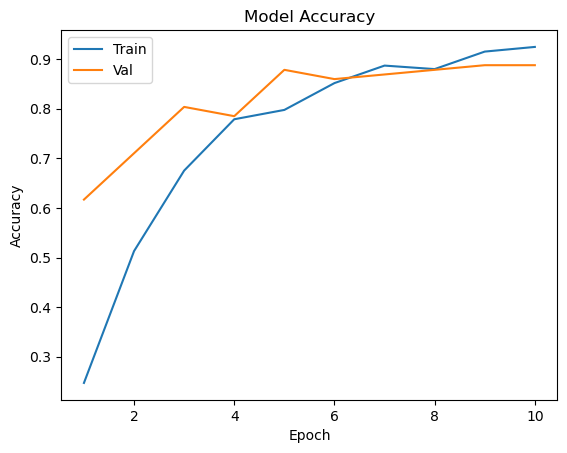

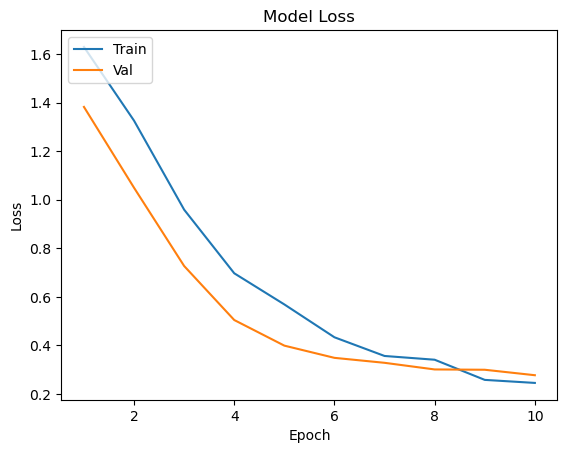

In [59]:
plot_learningCurve(history, 10)

### Confusion Matrix

In [62]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


In [64]:
y_prob = model.predict(X_test)

y_pred = np.argmax(y_prob, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

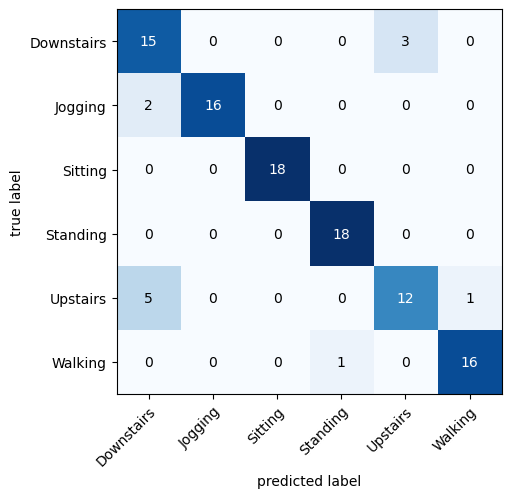

In [66]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=False, figsize=(5,5))